# Assignment 5: Bootstrap Confidence Intervals and Regression Analysis

This assignment covers **Chapters 13, 15-16** from the textbook as well as lecture material from Weeks 11-12. Please complete this assignment by providing answers in cells after the question. Use **Code** cells to write and run any code you need to answer the question and **Markdown** cells to write out answers in words. After you are finished with the assignment, remember to download it as an **HTML file** and submit it in **ELMS**.

This assignment is due by **11:59pm on Friday, November 1**. Revisions are due by **11:59pm on Friday, November 8**.

In [3]:
import numpy as np
from datascience import *


# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots

# This is for linear regression
from sklearn.linear_model import LinearRegression

## Question 1. Plot the Vote


Four candidates are running for President of Dataland. A polling company surveys 1000 people selected uniformly at random from among voters in Dataland, and it asks each one who they are planning on voting for. After compiling the results, the polling company releases the following proportions from their sample:

|Candidate  | Proportion|
|:------------:|:------------:|
|Candidate C | 0.47 |
|Candidate T | 0.38 |
|Candidate J | 0.08 |
|Candidate S | 0.03 |
|Undecided   | 0.04 |

These proportions represent a uniform random sample of the population of Dataland. We will attempt to estimate the corresponding *parameters*, or the proportion of the votes that each candidate will receive from the entire population.  We will use confidence intervals to compute a range of values that reflects the uncertainty of our estimates.

The table `votes` contains the results of the survey. Candidates are represented by their initials. Undecided voters are denoted by `U`.

In [4]:
votes = Table.read_table('votes.csv')
num_votes = votes.num_rows
votes

vote
C
J
C
S
J
J
T
C
T
C


**a)** Complete the function `one_resampled_proportion` below. It should return Candidate C's proportion of votes after computing one bootstrap sample of `tbl`.

**Note:** `tbl` will always be in the same format as `votes`.

In [1]:
def one_resampled_proportion(tbl):
    bootstrap = tbl.sample() # Draw a bootstrap sample.
    num_C = bootstrap.where('vote','C').num_rows # Number of people who voted for C
    num_total = bootstrap.num_rows # Total number of people
    
    return num_C / num_total

In [23]:
one_resampled_proportion(votes)

0.47

**b)** Below, with the help of `one_resampled_proportion`, complete the given code that will use bootstrapped samples from `votes` to compute estimates of the true proportion of voters who are planning on voting for **Candidate C**. The value of `num_samps` is the number of bootstrap samples to be taken.

In [28]:
def proportions_in_resamples(num_samps):
    prop_c = make_array()
    for i in np.arange(num_samps):
        prop_c = np.append(prop_c, one_resampled_proportion(votes))
    
    return prop_c

In the following cell, we run the function you just defined, `proportions_in_resamples`, and create a histogram of the calculated statistic for the 5,000 bootstrap estimates of the proportion of voters who voted for Candidate C. Based on what the original polling proportions were, does the graph seem reasonable? 

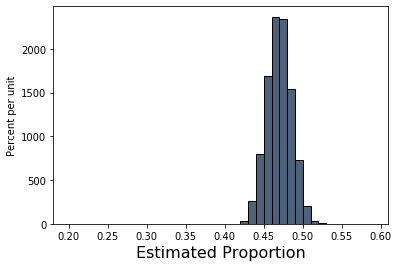

In [29]:
resampled_proportions = proportions_in_resamples(5000)
Table().with_column('Estimated Proportion', resampled_proportions).hist(bins=np.arange(0.2,0.6,0.01))

> The original proportion of votes that Candidate C got was 0.47, so this does seem to be reasonable. The histogram is centered around 0.47 and is unimodal and symmetric.

**c)** Using the array `resampled_proportions`, find the values at the two edges of the middle 95% of the values in the data. (Compute the lower and upper ends of the interval, named `c_lower_bound` and `c_upper_bound`, respectively.)

In [45]:
# Bounds
c_lower_bound = percentile(2.5, resampled_proportions)
c_upper_bound = percentile(97.5, resampled_proportions)

print(make_array(c_lower_bound,c_upper_bound))

[0.44 0.5 ]


**d)** Define the function `one_resampled_difference` that returns exactly one estimate of Candidate C's true *lead* over Candidate T after computing one bootstrap sample of `tbl`.

In [46]:
def one_resampled_difference(tbl):
    bootstrap = tbl.sample()
    c_proportion = bootstrap.where('vote','C').num_rows / bootstrap.num_rows
    t_proportion = bootstrap.where('vote','T').num_rows / bootstrap.num_rows
    
    return c_proportion - t_proportion
    

**e)** The survey results seem to indicate that Candidate C is beating Candidate T among voters. We would like to use confidence intervals to determine a range of likely values for her true *lead*. Candidate C's lead over Candidate T is:

$$\text{Candidate C's proportion of the vote} - \text{Candidate T's proportion of the vote}.$$

Using the function `proportions_in_resamples` above as a model, use the bootstrap to compute an approximate distribution for Candidate C's lead over Candidate T. Plot a histogram of the the resulting samples.

**Note:** Candidate C's lead can be negative.

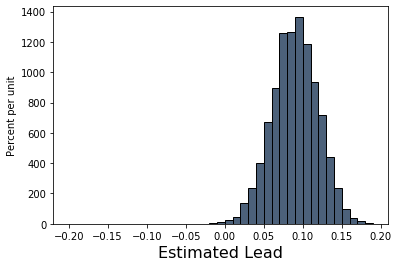

In [48]:
bins = np.arange(-0.2,0.2,0.01)

def leads_in_resamples(num_samps):
    prop_diff = make_array()
    for i in np.arange(num_samps):
        prop_diff = np.append(prop_diff, one_resampled_difference(votes))
    
    return prop_diff

sampled_leads = leads_in_resamples(5000)
Table().with_column('Estimated Lead', sampled_leads).hist(bins=bins)

**f)** Use the simulated data from Question 5 to compute an approximate 95% confidence interval for Candidate C's true lead over Candidate T.

In [49]:
# Bounds
c_lower_bound = percentile(2.5, sampled_leads)
c_upper_bound = percentile(97.5, sampled_leads)

print(make_array(c_lower_bound,c_upper_bound))

[0.031 0.147]


## Question 2. Interpreting Confidence Intervals

The staff computed the following 95% confidence interval for the proportion of Candidate C voters: 

$$[.439, .5]$$

(Your answer may have been a bit different; that doesn't mean it was wrong!)

**a)** Can we say that there is a 95% probability that the interval [.439, .5] contains the true proportion of the population who is voting for Candidate C? Explain your answer.

> No. The correct interpretation of the confidence interval is that 95% of intervals generated in this way will contain the true proportion of people who is voting for Candidate C in the population.

**b)** The staff also created 80%, 90%, and 99% confidence intervals from the same sample, but we forgot to label which confidence interval represented which percentages! Identify which confidence levels correspond to which confidence intervals, and match each pair by writing the percentage after each interval below. **Then**, explain your thought process.

The intervals are below:

* [.444,.495] 
* [.450,.490] 
* [.430,.511]

> The lower the confidence level, the narrower the confidence interval should be. Intuitively, you can think of a lower confidence level meaning a lower level of confidence in the interval, which would mean a narrower interval, all things remaining equal. You can also think about how we obtain the confidence interval using percentiles. A lower confidence level means the values would be closer together.

> Therefore, the 80% confidence interval is [.450,.490], the 90% confidence interval is [.444,.495], and the 99% confidence interval is [.430,.511].

**c)** Suppose we produced 10,000 new samples (each one a uniform random sample of 1,000 voters) from the population and created a 95% confidence interval from each one. Roughly how many of those 10,000 intervals do you expect will actually contain the true proportion of the population?

> Since it is a 95% confidence interval, we would expect about 95% of them to contain the true proportion. This means about 9,500 of them will contain the true proportion of the population.

**d)** Recall the second bootstrap confidence interval you created, estimating Candidate C's lead over Candidate T. Among
voters in the sample, her lead was .09. The staff's 95% confidence interval for her true lead (in the population of all voters) was

$$[.032,.15].$$

Suppose we are interested in testing a simple yes-or-no question:

> "Are the candidates tied?"

Our null hypothesis is that the proportions are equal, or, equivalently, that Candidate C's lead is exactly 0. Our alternative hypothesis is that her lead is not equal to 0. Say we use a 5% P-value cutoff.  Do we reject the null, fail to reject the null, or are we unable to tell using our staff confidence interval?

*Hint:* If you're confused, take a look at [this chapter](https://www.inferentialthinking.com/chapters/13/4/using-confidence-intervals.html) of the textbook.

> Since the confidence interval does not contain 0 and it is completely above 0, we would reject the null hypothesis and conclude that the candidates are not tied.

**e)** What if, instead, we use a P-value cutoff of 1%? Do we reject the null, fail to reject the null, or are we unable to tell using our staff confidence interval?

> With a higher confidence level, the interval would get wider while still being centered around 0.09. Since we don't know how wide the interval will be, we can't tell using this confidence interval.

**f)** What if we use a P-value cutoff of 10%? Do we reject, fail to reject, or are we unable to tell using our confidence interval?

> With a lower confidence level, the interval would get narrower while still being centered around 0.09. Since the narrower interval would be completely contained within the 95% confidence interval and the 95% confidence interval did not contain 0, we would still reject the null hypothesis.

## Question 3. Cryptocurrencies


Imagine you're an investor in December 2017. Cryptocurrencies, online currencies backed by secure software, are becoming extremely valuable, and you want in on the action!

The two most valuable cryptocurrencies are Bitcoin (BTC) and Ethereum (ETH). Each one has a dollar price attached to it at any given moment in time. For example, on December 1st, 2017, one BTC costs $\$$10859.56 and one ETH costs $\$$424.64. 

**You want to predict the price of ETH at some point in time based on the price of BTC.** Below, we [load](https://www.kaggle.com/jessevent/all-crypto-currencies/data) two tables called `btc` and `eth`. Each has 5 columns:
* `date`, the date
* `open`, the value of the currency at the beginning of the day
* `close`, the value of the currency at the end of the day
* `market`, the market cap or total dollar value invested in the currency
* `day`, the number of days since the start of our data

In [51]:
btc = Table.read_table('btc.csv')
btc.show(5)

date,open,close,market,day
2015-09-29,239.02,236.69,3505090000,1
2015-09-30,236.64,236.06,3471280000,2
2015-10-01,236,237.55,3462800000,3
2015-10-02,237.26,237.29,3482190000,4
2015-10-03,237.2,238.73,3482100000,5


In [52]:
eth = Table.read_table('eth.csv')
eth.show(5)

date,open,close,market,day
2015-09-29,0.579414,0.661146,42607700,1
2015-09-30,0.661192,0.738644,48636600,2
2015-10-01,0.734307,0.690215,54032300,3
2015-10-02,0.683732,0.678574,50328700,4
2015-10-03,0.678783,0.687171,49981900,5


**a)** Create a line plot that visualizes the BTC and ETH open prices as a function of time. Both bth and etc open prices should be plotted on the same graph.

In [54]:
# Create table with information we want
open_prices = Table().with_columns('Date', btc.column('date'), 'Bitcoin', btc.column('open'), 'Ethereum', eth.column('open'))

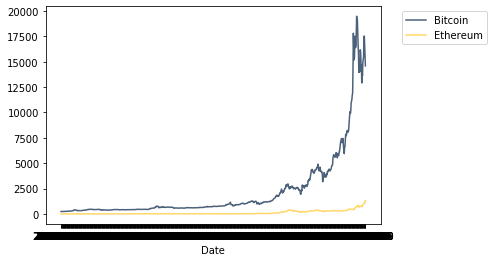

In [55]:
# plot the graph
open_prices.plot('Date')

**b)** Now, let's fit a least squares regression line to predict Ethereum open prices using Bitcoin open prices. 

To find a regression line, we can use the `LinearRegression()` object in the `sklearn` package. To do this, we first create a model object, called `ols` below. Think of this object has having all of the instructions for fitting a linear regression.

In [56]:
ols = LinearRegression()

Then we can get the regression output by giving it the `X` and `y` data. Note that we need to provide each of them in a certain format: the `X` needs to take in Table rows, while the `y` can take in a numpy array.

In [57]:
predictor = btc.select('open').rows
outcome = eth.column('open')

ols.fit(X = predictor, y = outcome)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

The `ols` object contains all of the information about the regression fit for the data we have. The slope can be found using the `.coef_` instance variable while the `.intercept` instance variables contains the intercept information.

In [58]:
# Slope
ols.coef_

array([0.05037151])

In [59]:
# Intercept
ols.intercept_

2.1384390569066483

What is the form of the equation of the best fit line for predicting Ethereum open prices from Bitcoin open prices? What would your conclusion be about the relationship between the two?

Predicted Ethereum open price = 2.138 + 0.05 * (Bitcoin open price)

> As Bitcoin open price goes up, Ethereum open price also goes up.

**c)** Find the slope and intercept of the least squares regression line for predicting Ethereum close prices from Bitcoin close prices.

In [60]:
predictor = btc.select('close').rows
outcome = eth.column('close')

ols.fit(X = predictor, y = outcome)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
# Slope
ols.coef_

array([0.05097321])

In [62]:
# Intercept
ols.intercept_

1.3947375726400395

**d)** You can find predicted values by using the `.predict()` method. For example, suppose you wanted to find the predicted Ethereum open price if the Bitcoin open price were 200, 250, or 300. 

In [ ]:
# Make a Table with the Bitcoin prices we want predict with
pred_x = Table().with_columns('btc', make_array(200,250,300))
ols.predict(pred_x.rows)

The predicted Ethereum open prices if Bitcoin open price was 200, 250, or 300 are 12.2, 14.7, or 17.2, respectively.

What would the predicted Ethereum close prices be if the Bitcoin close prices were 100, 150, or 200?

In [63]:
# Make a Table with the Bitcoin prices we want predict with
pred_x = Table().with_columns('btc', make_array(100, 150, 200))
ols.predict(pred_x.rows)

array([ 6.4920582 ,  9.04071852, 11.58937884])

**e)** Considering the shape of the scatter plot of the true data, is the model we used reasonable? If so, what features or characteristics make this model reasonable? If not, what features or characteristics make it unreasonable?

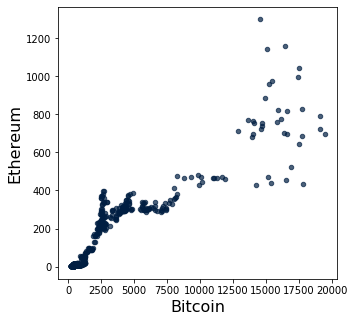

In [66]:
open_prices.select('Bitcoin', 'Ethereum').scatter('Bitcoin')

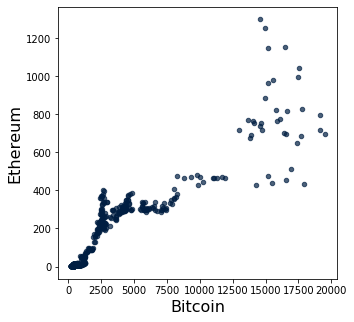

In [67]:
close_prices = Table().with_columns('Date', btc.column('date'), 'Bitcoin', btc.column('close'), 'Ethereum', eth.column('close'))
close_prices.select('Bitcoin', 'Ethereum').scatter('Bitcoin')

> These do not look like linear relationships. In addition, it seems as though we have a hetereoskedacity problem, with a fan-like shape indicdating non-constant variance.